In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
print ('Training data shape: ', x_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


查看一张图片

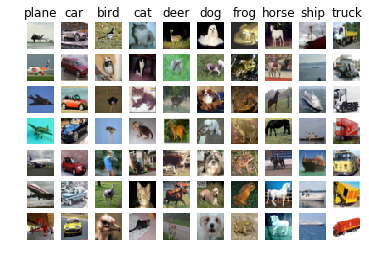

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

输入输出的格式整理

In [6]:
from keras.utils import np_utils

In [7]:
x_train = x_train/255 #彩色图片归一化
x_test = x_test/255  #彩色图片归一化
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

设计CNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam

In [21]:
model = Sequential() #空神经网络

In [22]:
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(32,32,3))) #filter 为3*3
model.add(Activation('relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [24]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model.add(Dropout(0.25))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [32]:
model.fit(x_train,y_train,batch_size=100,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50000/50000 [==============================] - 85s 2ms/step - loss: 1.5333 - acc: 0.4375
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/step - loss: 1.1469 - acc: 0.5921
Epoch 3/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.9848 - acc: 0.6505
Epoch 4/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.8749 - acc: 0.6901
Epoch 5/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.7917 - acc: 0.7197


In [40]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 590us/step


In [41]:
print('loss:',score[0])

loss: 0.7991946641921998


In [42]:
print('acc:',score[1])

acc: 0.7219


In [43]:
model_json = model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('CIFAR10_model_weights_cnn1.h5')